In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#path = "C:\Users\rfare\miniconda3\envs\python-for-data-analysis\Python student data analysis\Students Exam Scores.csv"
df = pd.read_csv('Students Exam Scores.csv')
df.head

<bound method NDFrame.head of        No.  Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0        0  female         NaN   bachelor's degree      standard       none   
1        1  female     group C        some college      standard        NaN   
2        2  female     group B     master's degree      standard       none   
3        3    male     group A  associate's degree  free/reduced       none   
4        4    male     group C        some college      standard       none   
...    ...     ...         ...                 ...           ...        ...   
30636  816  female     group D         high school      standard       none   
30637  890    male     group E         high school      standard       none   
30638  911  female         NaN         high school  free/reduced  completed   
30639  934  female     group D  associate's degree      standard  completed   
30640  960    male     group B        some college      standard       none   

      ParentMaritalSt

In [10]:
df.describe()

,No.,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No.                  30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [12]:
df.isnull().sum()

No.                       0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [13]:
df.drop('No.', axis=1, inplace=True)
df.head

<bound method NDFrame.head of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
1      female     group C        some college      standard        NaN   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0            

In [14]:
df.shape

(30641, 14)

In [15]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace("05-Oct", "5-10")
df.head

<bound method NDFrame.head of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
1      female     group C        some college      standard        NaN   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0            

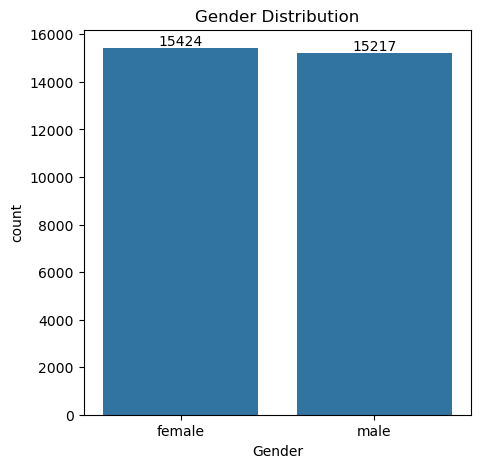

In [30]:
plt.figure(figsize=(5,5))
plt.title('Gender Distribution')
ax = sns.countplot(data=df, x='Gender')
ax.bar_label(ax.containers[0])
plt.show()

In [22]:
gb = df.groupby("ParentEduc").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


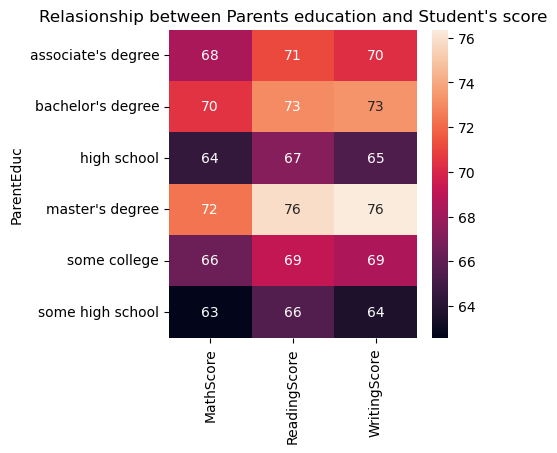

In [33]:
plt.figure(figsize=(4,4))
sns.heatmap(gb, annot=True)
plt.title("Relasionship between Parents education and Student's score")
plt.show()

In [26]:
gb1 = df.groupby("ParentMaritalStatus").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


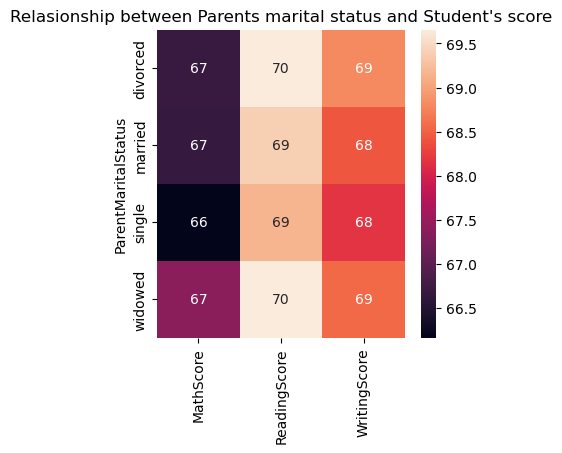

In [34]:
plt.figure(figsize=(4,4))
sns.heatmap(gb1, annot=True)
plt.title("Relasionship between Parents marital status and Student's score")
plt.show()

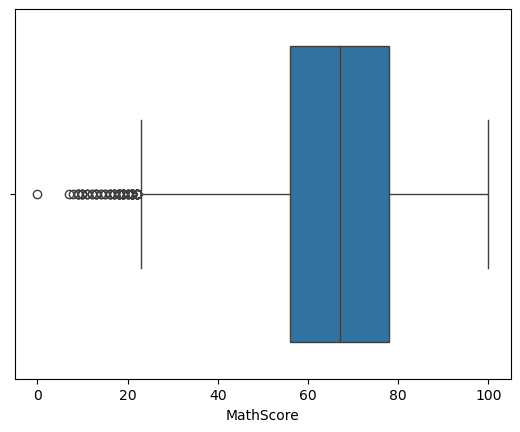

In [37]:
sns.boxplot(data=df, x='MathScore')
plt.show()

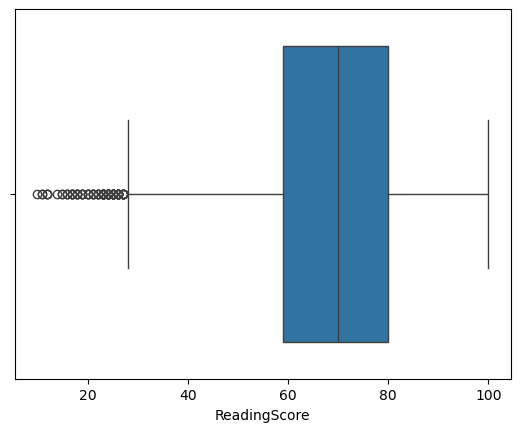

In [38]:
sns.boxplot(data=df, x='ReadingScore')
plt.show()

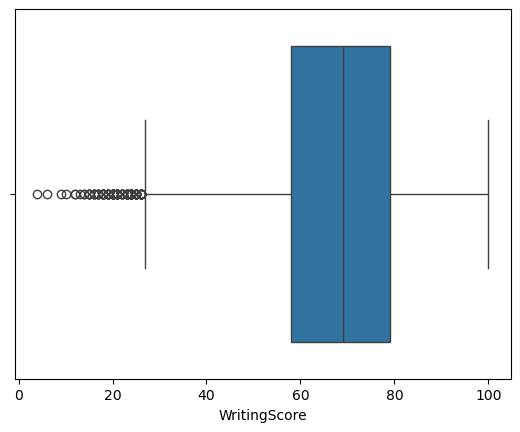

In [39]:
sns.boxplot(data=df, x='WritingScore')
plt.show()

In [40]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [55]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup']=='group B')].count()
groupC = df.loc[(df['EthnicGroup']=='group C')].count()
groupD = df.loc[(df['EthnicGroup']=='group D')].count()
groupE = df.loc[(df['EthnicGroup']=='group E')].count()
groupNan = df.loc[(df['EthnicGroup']=='NaN')].count()

In [56]:
groupNan

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

[2219, 5826, 9212, 7503, 4041]


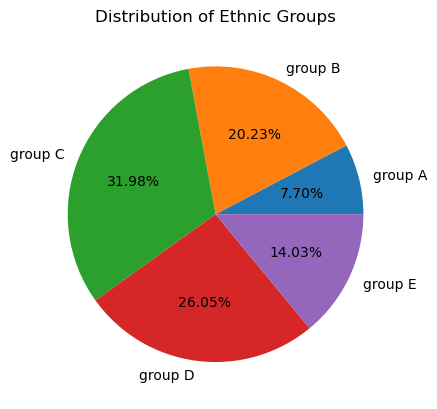

In [67]:
mylist =  [groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'], groupE['EthnicGroup']]

print(mylist)
l = ['group A', 'group B', 'group C', 'group D', 'group E']
plt.pie(mylist, labels=l, autopct='%1.2f%%')
plt.title("Distribution of Ethnic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

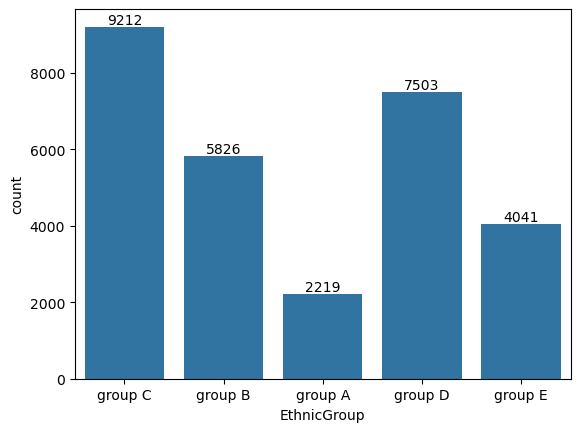

In [66]:
ax = sns.countplot(data=df, x='EthnicGroup')
ax.bar_label(ax.containers[0])

In [68]:
gb2 = df.groupby("EthnicGroup").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb2

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,62.991888,66.787742,65.251915
group B,63.490216,67.320460,65.895125
group C,64.695723,68.438233,66.999240
group D,67.666400,70.382247,70.890844
group E,75.298936,74.251423,72.677060


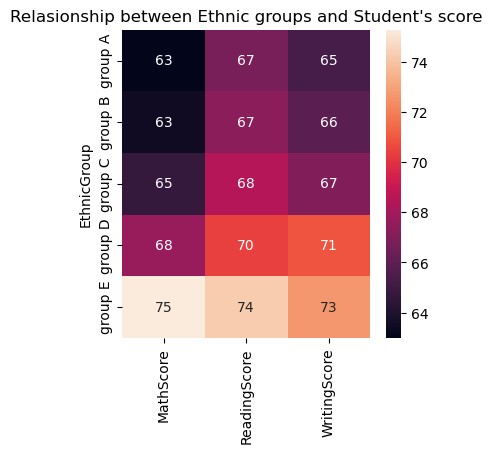

In [69]:
plt.figure(figsize=(4,4))
sns.heatmap(gb2, annot=True)
plt.title("Relasionship between Ethnic groups and Student's score")
plt.show()

### Key Insights

- #### The number of female students is more than the number of males.
- #### Education of the parents have a good impact on the student's scores.
- #### There in negligible impact on the student's score due to their parents marital status.
- #### Group B,C,D are the protagonists in the ethnic groups.
- #### From Group A to Group E the scores keep improving. 
